In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Load the dataset into a pandas dataframe and visualize the relationship between each input attribute and the test scores using a scatter plot.

In [147]:
df = pd.read_csv("data.csv")

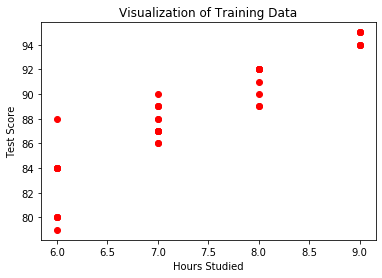

In [148]:
plt.scatter(df["Hours Studied"], df["Test Score"], color="red")
plt.title("Visualization of Training Data")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.show()

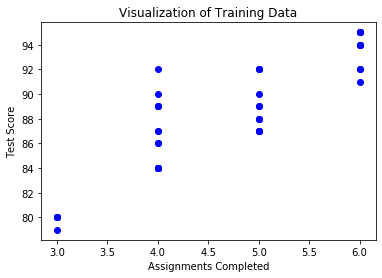

In [149]:
plt.scatter(df["Assignments Completed"], df["Test Score"], color="blue")
plt.title("Visualization of Training Data")
plt.xlabel("Assignments Completed")
plt.ylabel("Test Score")
plt.show()
#plt.scatter(df["Lecture Attended"], df["Test Score"], color="green")
#plt.scatter(df["Questions Asked"], df["Test Score"], color="purple")


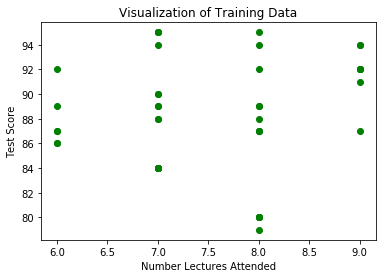

In [150]:
plt.scatter(df["Lecture Attended"], df["Test Score"], color="green")
plt.title("Visualization of Training Data")
plt.xlabel("Number Lectures Attended")
plt.ylabel("Test Score")
plt.show()

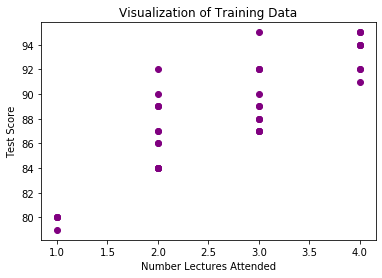

In [151]:
plt.scatter(df["Questions Asked"], df["Test Score"], color="purple")
plt.title("Visualization of Training Data")
plt.xlabel("Number Lectures Attended")
plt.ylabel("Test Score")
plt.show()

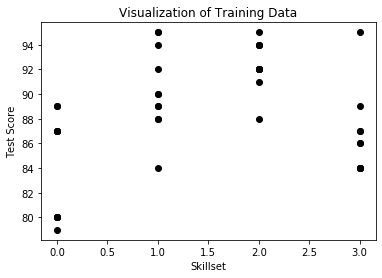

In [152]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

xSkills = df.iloc[:, :-1].values
le = LabelEncoder() 
xSkills[:, 5] = le.fit_transform((xSkills[:, 5]))

plt.scatter(xSkills[:, 5], df["Test Score"], color="black")
plt.title("Visualization of Training Data")
plt.xlabel("Skillset")
plt.ylabel("Test Score")
plt.show()

2. Split the data into training and testing datasets (80% training data, 20% testing data).

In [153]:
x = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

In [154]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

3. Implement simple linear regression to predict test scores based on the hours studied. Evaluate the model's performance using mean squared error (MSE) and other relevant metrics. 

In [155]:
from sklearn.linear_model import LinearRegression
lRegressor = LinearRegression() 
lRegressor.fit(x_train, y_train)

LinearRegression()

In [156]:
# Predicting the test set results...
y_pred = lRegressor.predict(x_test)

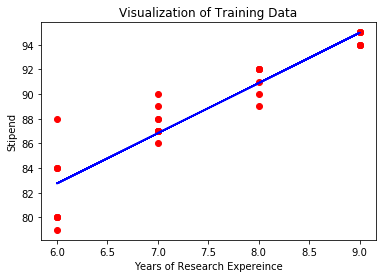

In [157]:
from sklearn import metrics
# visualizing data...
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, lRegressor.predict(x_train), color = "blue")
plt.title("Visualization of Training Data")
plt.xlabel("Years of Research Expereince")
plt.ylabel("Stipend")
plt.show()

In [158]:
from sklearn import metrics
# you can compare outputted values of y_pred to y_test to see how close our prediction is to the actual value...
print(metrics.mean_squared_error(y_test, y_pred))   # error = high b/c of low number of data / test runs.
print(metrics.mean_absolute_error(y_test, y_pred))

2.3080147509342
1.444144953578918


4. Handle Categorical attribute Skill Set

In [159]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [160]:
x2 = df.iloc[:, :-1]

In [161]:
ct = ColumnTransformer([("Skillset", OneHotEncoder(), [5])], remainder="passthrough")
x2 = np.array(ct.fit_transform(x2))

# avoiding dummy variable trap
x2 = x2[:, 1:]

5. Implement multiple linear regression to predict test scores based on the number of hours studied and other relevant features. Evaluate the performance of the model.

In [162]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train2, y_train2)

# predict test results
y_pred2 = lr.predict(x_test2)

from sklearn import metrics
# you can compare outputted values of y_pred to y_test to see how close our prediction is to the actual value...
print(metrics.mean_squared_error(y_test2, y_pred2))   # error = high b/c of low number of data / test runs.
print(metrics.mean_absolute_error(y_test2, y_pred2))

2.57920410580577
1.3098181828193607


6. Identify the importance of attributes in predicting the test scope on the basis of their P-value.

In [163]:
import statsmodels.api as sma
pVal = sma.OLS(x_train2, y_train2) 
results = pVal.fit()
results.params

array([[0.002989  , 0.00302905, 0.00253391, 0.0840378 , 0.05403132,
        0.08504627, 0.03114237, 0.02464012]])

Recall: if p-value > 0.05, we will reject the Ho. Else, we will accept it. We have three columns with p-values > 0.05 that will be accepted.

7. Implement polynomial linear regression to predict test scores based on the number of hours studied. Evaluate the performance of the model.

In [164]:
# Creating Data Frames
X3 = df.iloc[:, 0:1].values
y3 = df.iloc[:, -1].values

In [165]:
from sklearn.preprocessing import PolynomialFeatures
polyReg = PolynomialFeatures(degree = 6)
xPoly = polyReg.fit_transform(X3)

In [166]:
#Training the Polynomial Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
polyModel = LinearRegression()
polyModel.fit(xPoly, y3)

LinearRegression()

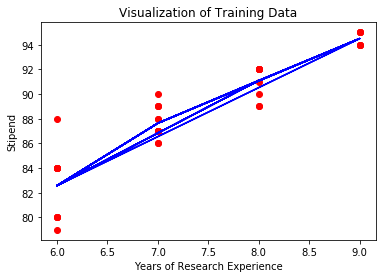

In [167]:
# Visualising the Training set results
plt.scatter(X3, y3, color = 'red')
plt.title('Visualization of Training Data')
plt.xlabel('Years of Research Experience')
plt.ylabel('Stipend')
plt.plot(X3, polyModel.predict(xPoly), color = 'blue')

In [168]:
polyModel.predict(polyReg.fit_transform([[6.5]]))

array([85.30743795])